In this chapter, we are going to discuss a way of testing your marketing ideas before you
fully commit to them. More specifically, we are going to learn about what A/B testing
is, why running A/B tests is important, and how it can help you reach your marketing goal
in a more efficient and less expensive way.

# A/B testing for marketing

A/B testing plays a critical role in decision-making processes across various industries. A/B
testing is essentially a method of comparing and testing the effectiveness and benefits of
two different business strategies. It can be considered as an experiment where two or more
variants are tested for a set period of time and then the experiment results are evaluated to
find the strategy that works best. Running A/B testing before fully committing to a single
option helps businesses take the guesswork out of their decision-making processes and
saves valuable resources, such as time and capital, that could have been wasted if the
chosen strategy did not work.

When you run A/B tests, it is important to test your hypothesis and seek for statistically
significant differences among the test groups. Student's t-test, or simply the t-test, is
frequently used to test whether the difference between two tests is statistically significant.
The t-test compares the two averages and examines whether they are significantly different
from each other.

There are two important statistics in a t-test—the t-value and p-value. The t-value measures
the degree of difference relative to the variation in the data. The larger the t-value is, the
more difference there is between the two groups. On the other hand, the p-value measures
the probability that the results would occur by chance. The smaller the p-value is, the more
statistically significant difference there will be between the two groups.

There is a concept of the null hypothesis and the alternate hypothesis, which you should be
familiar with. Generally speaking, the null hypothesis is that the two groups show no
statistically significant difference. On the other hand, the alternate hypothesis states that the
two groups show a statistically significant difference. When the t-value is larger than a
threshold and the p-value is smaller than a threshold, we say that we can reject the null
hypothesis and that the two groups show a statistically significant difference. Typically,
0.01 or 0.05 are used as the p-value thresholds for testing statistical significance. If the pvalue
is less than 0.05, then it suggests that there is less than 5% probability that the
difference between the two groups occurs by chance. In other words, the difference is
highly unlikely to be by chance.

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/muratbakir/Desktop/Hands_on_Data_Science/Chapter_12/AB_Testing/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [8]:
df.shape

(548, 7)

# Data analysis

Let's take a deeper look at the data. In this section, we are going to focus on understanding
the distributions of sales, market sizes, store locations, and store ages used to test different
promotions. The goal of this analysis is to make sure the controls and attributes of each of
the promotion groups are symmetrically distributed, so that the promotion performances
among different groups are comparable to each other.

- Total Sales

In [9]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

In [18]:
df.groupby('Promotion')['SalesInThousands'].sum()

Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64

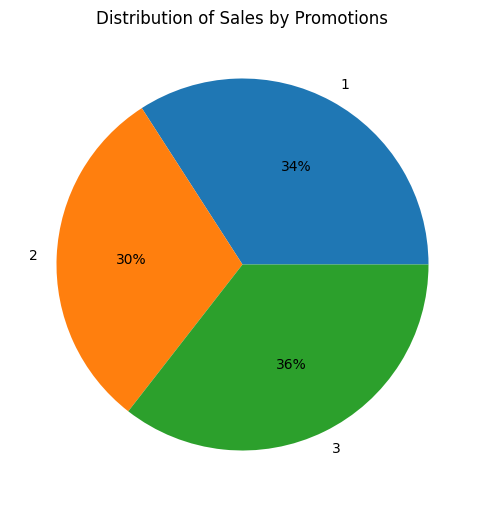

In [21]:
ax = df.groupby('Promotion')['SalesInThousands'].sum().plot(
  kind='pie',
  autopct='%1.0f%%',
  figsize=(6,8),
  title='Distribution of Sales by Promotions'
)

ax.set_ylabel('')
plt.show()

As is easily visible from this pie chart, promotion group 3 has the largest aggregate sales
among the three groups. However, each promotion group takes roughly about one third of
the total sales during the promotion weeks. Similarly, we can also visualize the
compositions of different market sizes in each promotion group.

- Market Size

In [22]:
df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

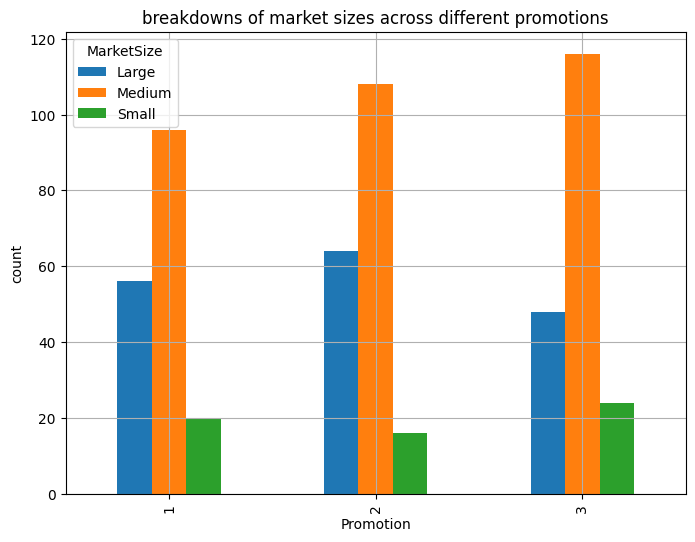

In [37]:
ax = df.groupby(['Promotion', 'MarketSize'])['MarketID'].count().unstack('MarketSize').plot(
  kind='bar',
  grid=True,
  figsize=(8,6)
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

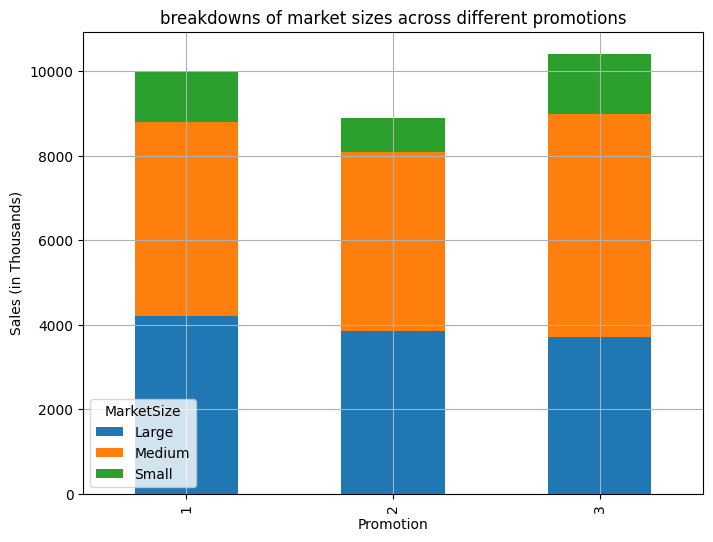

In [39]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(8,6),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

- Store Age

In [40]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

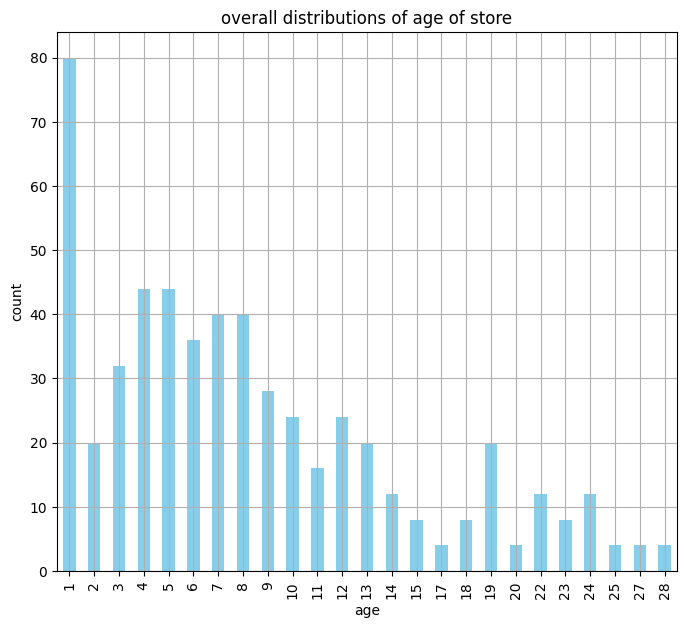

In [42]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(8,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

As you can see from this plot, a large number of stores are 1 year old and the majority of
stores are 10 years old or less. However, what we are more interested in is whether the
stores in the three different promotion groups have similar store age profiles.

In [43]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


As you may notice from this output, it is much easier to understand the overall store age
distributions from these summary statistics. We can see that all three test groups seem to
have similar store age profiles. The average ages of stores for the three groups are 8–9 years
old and the majority of the stores are 10–12 years old or younger.
By analyzing how each promotion or test group is comprised, we could verify that the store
profiles are similar to each other. This suggests that the sample groups are well controlled
and the A/B testing results will be meaningful and trustworthy.

# Statistical Significance

In [45]:
import numpy as np
from scipy import stats

In [ ]:
df

In [46]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [47]:
t

6.42752867090748

In [48]:
p

4.2903687179871785e-10

In [49]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_7909/800757193.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Promotion').mean()['SalesInThousands']


Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

The p-value we get from running this code
is 4.143e-10. This is an extremely small number that is close to 0. As discussed
earlier, a p-value closer to 0 suggests that there is a strong evidence against the
null hypothesis and that the difference between the two test groups is significant.

The average sales (in thousands) for promotion group 1 is about 58.1, and for
promotion group 2 it's about 47.33. From our t-test, we have shown that the
marketing performances for these two groups are significantly different and that
promotion group 1 outperforms promotion group 2.

In [50]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [51]:
t

1.5560224307758634

In [52]:
p

0.1205914774222948

On the surface, the average sales from promotion group 1 (58.1) looks higher
than those from promotion group 2 (55.36). However, when we run a t-test
between these two groups, we get a t-value of 1.556 and a p-value of 0.121. The
computed p-value is much higher than 0.05, which is a generally accepted cutoff
line. This suggests that the marketing performance from promotion group 1 is
not statistically different from the marketing performance from promotion group
2. Thus, even though promotion group 1's average sales number is higher than
the promotion group 2's from the A/B test, the difference is not statistically
significant and we cannot conclude that promotion group 1 performs much better
than promotion group 2. From these evaluation results, we can conclude that
promotion groups 1 and 3 outperform promotion group 2, but the difference
between promotion groups 1 and 3 is not statistically significant.